In [17]:
from sklearn.datasets import make_blobs

# centers=2 (2 class), cluster_std 클러스터의 표준편차
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

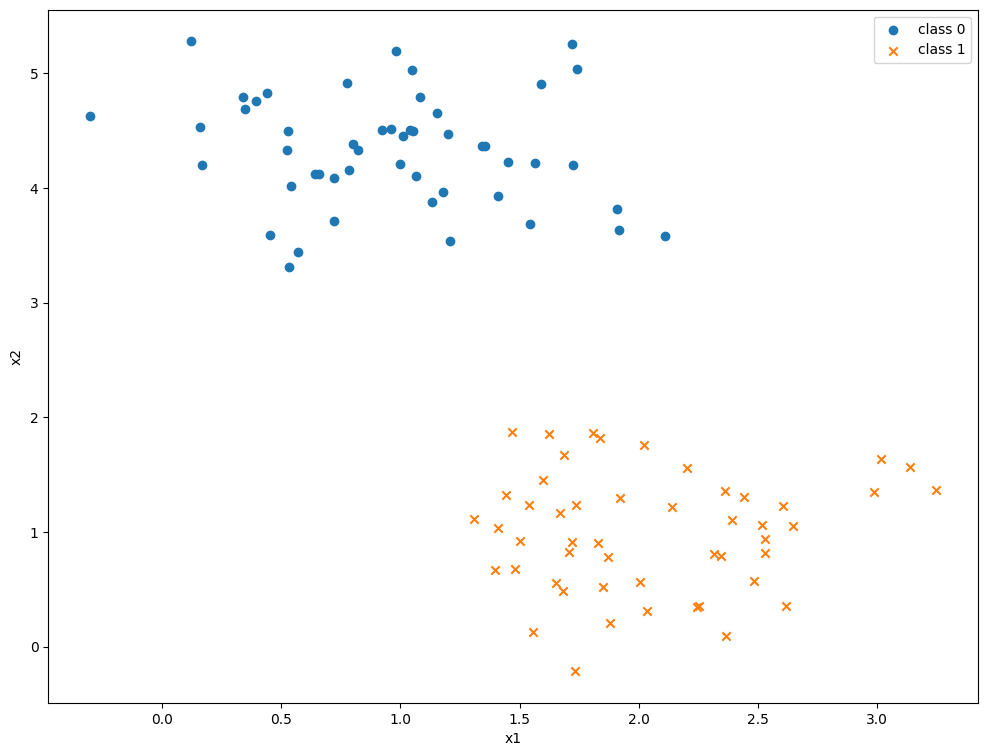

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", label="class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

In [20]:
from sklearn.svm import SVC

model = SVC(kernel="linear").fit(X_train, y_train)

In [21]:
# 클래스별 서포트 벡터의 개수(0 2개, 1 1개)
model.n_support_

array([2, 1])

In [22]:
# 서포트 벡터의 인덱스
model.support_

array([18, 43, 13])

In [23]:
# 서포트 벡터의 값
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [24]:
import numpy as np


def plot_svc(model, ax=None):
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)  # 정방행렬
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # 1차원으로 만들고 행렬 전치

    # 판별함수에 입력
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P, levels=[-1, 0, 1], colors="k", linestyles=["--", "-", "--"])

    # 서포트 벡터 그리기
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

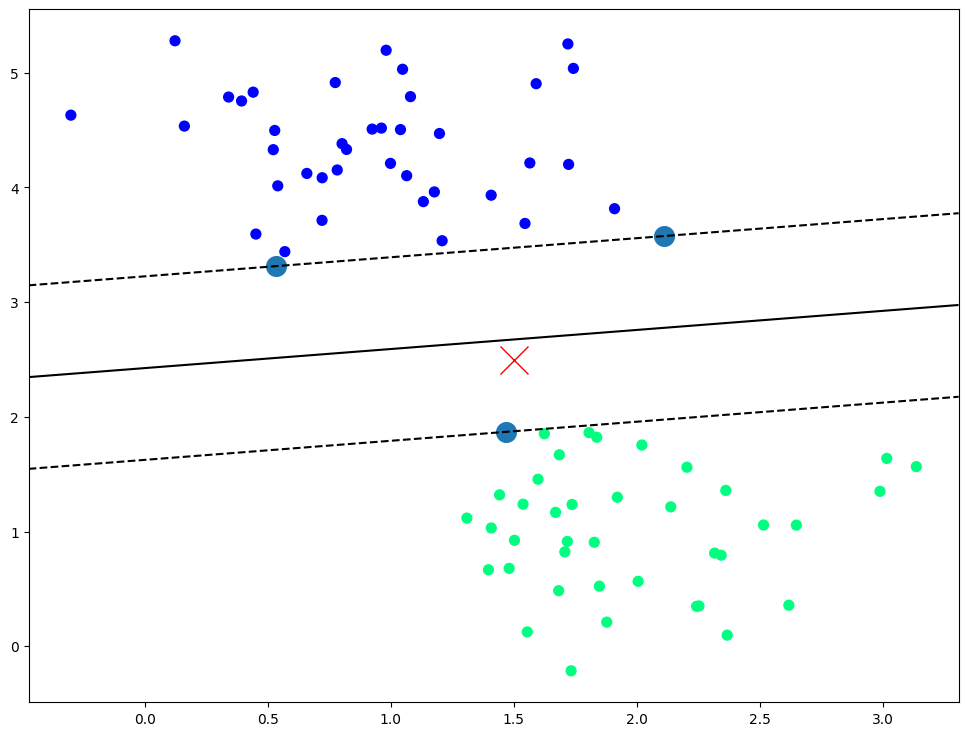

In [25]:
plt.figure(figsize=(12, 9))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap="winter")

# X_new 데이터는 어느 클래스로 분류될까요?
X_new = [1.5, 2.5]
plt.plot(X_new[0], X_new[1], "x", color="red", markersize=20)
plot_svc(model)

In [26]:
model.predict([[1.5, 2.5]])

array([1])

In [27]:
from sklearn.model_selection import GridSearchCV

params = {"C": [0.1, 1, 10, 100], "gamma": [0.00001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print("Best Parameters :\n", grid.best_params_)
print("Best Estimator :\n", grid.best_estimator_)

Best Parameters :
 {'C': 0.1, 'gamma': 1e-05}
Best Estimator :
 SVC(C=0.1, gamma=1e-05)


In [28]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1e-05)

In [29]:
print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))

학습용 : 1.0
검증용 : 1.0


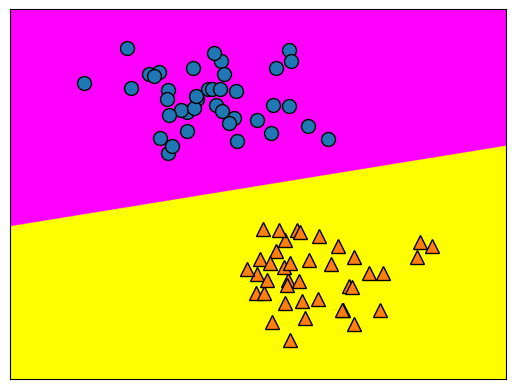

In [30]:
import mglearn

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.plots.plot_2d_classification(model, X_train, cm="spring")